In [84]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from tqdm import tqdm

dataset_path = r"/Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset"

image_paths = glob(os.path.join(dataset_path, "**", "*.jpg"), recursive=True)
print(f"Total Images: {len(image_paths)}")


Total Images: 1800


100%|██████████| 1800/1800 [00:01<00:00, 1664.69it/s]


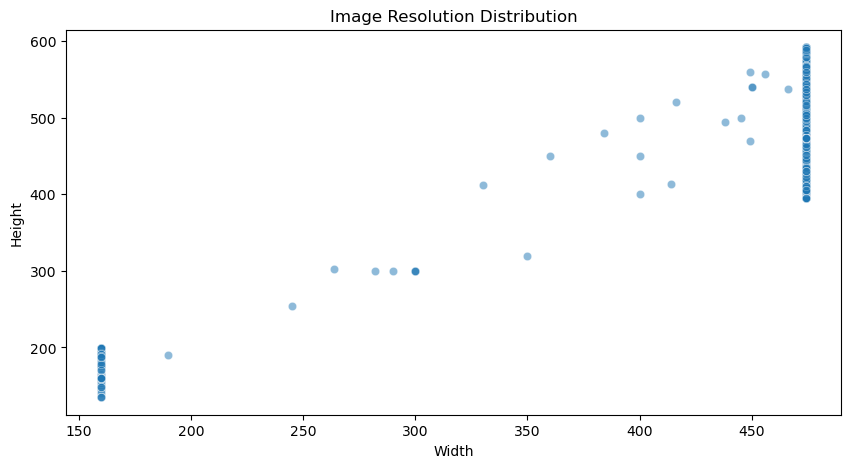

Width
474    1675
160     100
300       3
400       3
449       2
450       2
414       1
282       1
445       1
438       1
Name: count, dtype: int64

Height
474    503
592    133
568     83
395     45
591     39
587     38
160     27
586     25
590     23
569     22
Name: count, dtype: int64


In [13]:
# Get image dimensions
image_sizes = []
for img_path in tqdm(image_paths):
    img = cv2.imread(img_path)
    if img is not None:
        image_sizes.append(img.shape[:2])  # (Height, Width)

# Convert to DataFrame
df_sizes = pd.DataFrame(image_sizes, columns=["Height", "Width"])

# Plot distribution of sizes
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_sizes, x="Width", y="Height", alpha=0.5)
plt.title("Image Resolution Distribution")
plt.show()
print(df_sizes["Width"].value_counts().head(10))
print()
print(df_sizes["Height"].value_counts().head(10))

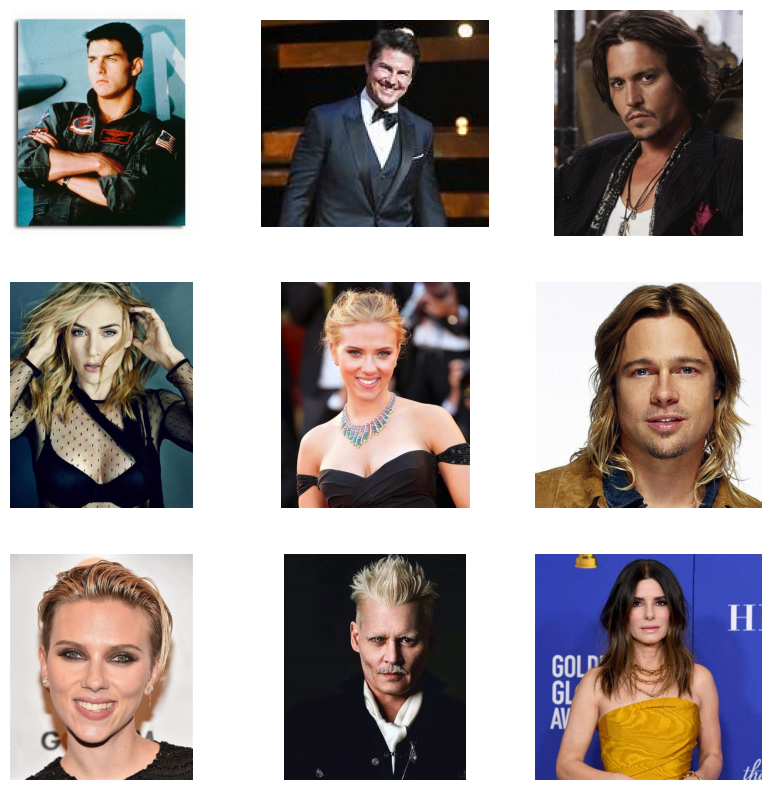

In [14]:
def show_sample_images(image_paths, num_samples=9):
    fig, axes = plt.subplots(3, 3, figsize=(10, 10))
    selected_paths = np.random.choice(image_paths, num_samples, replace=False)

    for ax, img_path in zip(axes.flatten(), selected_paths):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
        ax.imshow(img)
        ax.axis("off")
    
    plt.show()

show_sample_images(image_paths)


I0000 00:00:1742930402.369712 17500469 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M1 Pro
W0000 00:00:1742930402.371243 18373832 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
100%|██████████| 1800/1800 [00:07<00:00, 243.30it/s]


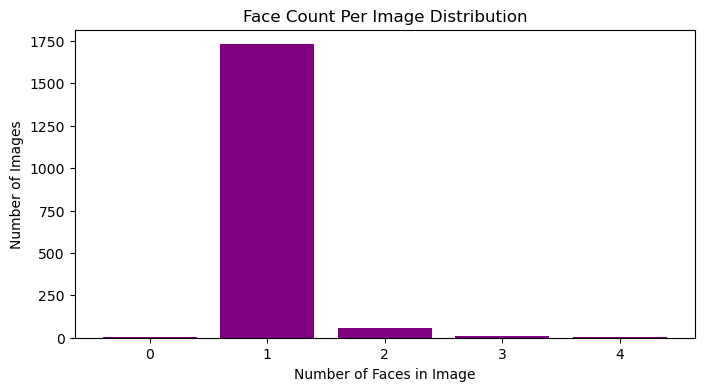

Total Images Processed: 1800

Face Count Distribution:
    Face Count  Image Count
4           0            2
0           1         1730
1           2           58
2           3            8
3           4            2


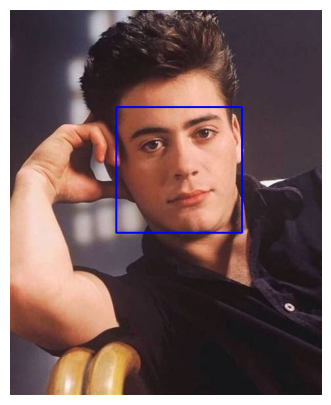

In [54]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import mediapipe as mp

# Initialize Mediapipe face detector
mp_face_detection = mp.solutions.face_detection
face_detector = mp_face_detection.FaceDetection(min_detection_confidence=0.5)

# Store face count statistics
face_counts = {}

def detect_faces(image_path, show_image=False):
    """ Detect faces in an image and optionally display the results. """
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    results = face_detector.process(img_rgb)
    face_count = 0  # Track number of faces in this image

    if results.detections:
        for detection in results.detections:
            face_count += 1
            bboxC = detection.location_data.relative_bounding_box
            ih, iw, _ = img.shape
            x, y, w, h = (bboxC.xmin * iw, bboxC.ymin * ih, bboxC.width * iw, bboxC.height * ih)

            # Draw bounding box
            cv2.rectangle(img, (int(x), int(y)), (int(x + w), int(y + h)), (255, 0, 0), 2)

    # Update face count distribution
    face_counts[face_count] = face_counts.get(face_count, 0) + 1

    # Show image if requested
    if show_image:
        plt.figure(figsize=(5, 5))
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.show()

# Process all images
for img_path in tqdm(image_paths):
    detect_faces(img_path, show_image=False)

# Convert face count data to DataFrame
df_faces = pd.DataFrame(face_counts.items(), columns=["Face Count", "Image Count"]).sort_values(by="Face Count")

# Plot face count distribution
plt.figure(figsize=(8, 4))
plt.bar(df_faces["Face Count"], df_faces["Image Count"], color="purple")
plt.xticks(df_faces["Face Count"])
plt.title("Face Count Per Image Distribution")
plt.xlabel("Number of Faces in Image")
plt.ylabel("Number of Images")
plt.show()

# Print EDA results
print("Total Images Processed:", sum(face_counts.values()))
print("\nFace Count Distribution:\n", df_faces)

# Test on a single image
detect_faces(image_paths[0], show_image=True)


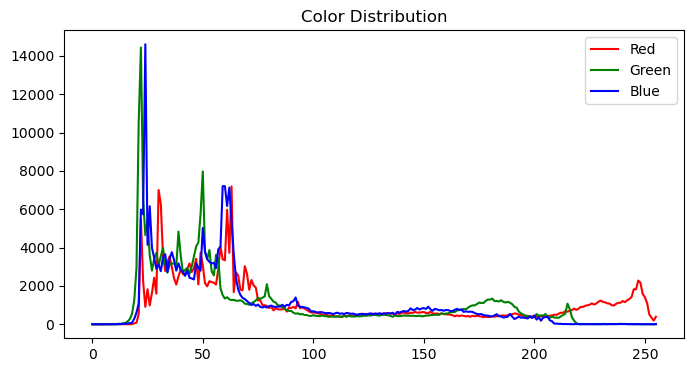

In [18]:
def plot_color_histogram(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    color_labels = ("Red", "Green", "Blue")
    plt.figure(figsize=(8, 4))
    
    for i, color in enumerate(color_labels):
        hist = cv2.calcHist([img], [i], None, [256], [0, 256])
        plt.plot(hist, label=color, color=color.lower())
    
    plt.legend()
    plt.title("Color Distribution")
    plt.show()

plot_color_histogram(image_paths[0])


In [42]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2
!cp shape_predictor_68_face_landmarks.dat ~/anaconda3/envs/unmasker/share/dlibimport/

--2025-03-25 21:10:12--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 [following]
--2025-03-25 21:10:13--  https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Connecting to dlib.net (dlib.net)|107.180.26.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2.2’

shape_predictor_68_ 100%[===================>]  61.07M  18.1MB/s    in 4.7s    

2025-03-25 21:10:18 (13.0 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2.2’ saved [64040097/64040097]



  2%|▏         | 41/1800 [00:01<00:48, 36.12it/s]

Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Robert Downey Jr/076_318ed434.jpg due to error: 'Error'


  4%|▎         | 67/1800 [00:01<00:45, 37.87it/s]

Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Robert Downey Jr/074_a86aab43.jpg due to error: 'Error'


  6%|▌         | 110/1800 [00:02<00:38, 43.43it/s]

Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Brad Pitt/067_571d88eb.jpg due to error: 'Error'
Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Brad Pitt/060_136e5ef5.jpg due to error: 'Error'
Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Brad Pitt/027_78f200c3.jpg due to error: 'Error'


  8%|▊         | 141/1800 [00:03<00:44, 37.62it/s]

Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Brad Pitt/028_181cbb8a.jpg due to error: 'Error'


  9%|▉         | 162/1800 [00:04<00:48, 33.61it/s]

Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Brad Pitt/054_9f01aefa.jpg due to error: 'Error'


 22%|██▎       | 405/1800 [00:11<00:37, 36.92it/s]

Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Tom Cruise/062_d4b7903f.jpg due to error: 'Error'


 23%|██▎       | 418/1800 [00:11<00:40, 33.74it/s]

Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Tom Cruise/080_566ea9e9.jpg due to error: 'Error'
Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Tom Cruise/033_d891acbd.jpg due to error: 'Error'


 27%|██▋       | 481/1800 [00:13<00:36, 36.43it/s]

Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Tom Cruise/078_076c27b8.jpg due to error: 'Error'


 28%|██▊       | 509/1800 [00:14<00:37, 34.80it/s]

Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Hugh Jackman/095_b464eda0.jpg due to error: 'Error'


 35%|███▍      | 626/1800 [00:17<00:35, 33.52it/s]

Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Angelina Jolie/004_f61e7d0c.jpg due to error: 'Error'


 36%|███▌      | 643/1800 [00:18<00:30, 37.56it/s]

Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Angelina Jolie/090_da55509f.jpg due to error: 'Error'


 38%|███▊      | 693/1800 [00:19<00:31, 35.25it/s]

Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Angelina Jolie/055_aaaf063c.jpg due to error: 'Error'


 41%|████      | 738/1800 [00:21<00:28, 37.16it/s]

Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Johnny Depp/018_14e5366f.jpg due to error: 'Error'


 42%|████▏     | 755/1800 [00:21<00:29, 35.65it/s]

Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Johnny Depp/053_5b42d9d9.jpg due to error: 'Error'


 44%|████▍     | 790/1800 [00:22<00:24, 40.41it/s]

Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Johnny Depp/091_c3ad83af.jpg due to error: 'Error'
Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Johnny Depp/043_77e393de.jpg due to error: 'Error'


 47%|████▋     | 842/1800 [00:23<00:22, 42.65it/s]

Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Tom Hanks/067_15f0e6bb.jpg due to error: 'Error'
Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Tom Hanks/022_df2ce089.jpg due to error: 'Error'
Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Tom Hanks/059_c7c906d9.jpg due to error: 'Error'


 48%|████▊     | 860/1800 [00:24<00:25, 36.93it/s]

Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Tom Hanks/100_b712e7ca.jpg due to error: 'Error'


 53%|█████▎    | 946/1800 [00:26<00:26, 32.80it/s]

Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Denzel Washington/006_2880115c.jpg due to error: 'Error'


 54%|█████▍    | 978/1800 [00:27<00:22, 36.61it/s]

Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Denzel Washington/059_3b848154.jpg due to error: 'Error'
Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Denzel Washington/093_4027b1e2.jpg due to error: 'Error'


 59%|█████▊    | 1055/1800 [00:30<00:21, 34.70it/s]

Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Kate Winslet/047_c6dd0c78.jpg due to error: 'Error'


 59%|█████▉    | 1065/1800 [00:30<00:18, 39.44it/s]

Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Kate Winslet/082_4bbff9c3.jpg due to error: 'Error'
Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Kate Winslet/050_0c20b215.jpg due to error: 'Error'


 61%|██████▏   | 1106/1800 [00:31<00:18, 37.23it/s]

Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Scarlett Johansson/102_97fca716.jpg due to error: 'Error'


 62%|██████▏   | 1120/1800 [00:31<00:17, 38.87it/s]

Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Scarlett Johansson/142_5d78bc85.jpg due to error: 'Error'
Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Scarlett Johansson/041_9913ca04.jpg due to error: 'Error'


 65%|██████▌   | 1170/1800 [00:33<00:18, 34.95it/s]

Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Scarlett Johansson/152_a5f9d1a6.jpg due to error: 'Error'
Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Scarlett Johansson/002_ea6e259d.jpg due to error: 'Error'


 66%|██████▌   | 1183/1800 [00:33<00:16, 37.33it/s]

Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Scarlett Johansson/050_c8461888.jpg due to error: 'Error'
Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Scarlett Johansson/128_40ed3346.jpg due to error: 'Error'


 68%|██████▊   | 1233/1800 [00:35<00:16, 34.63it/s]

Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Scarlett Johansson/077_776d5e0f.jpg due to error: 'Error'


 69%|██████▉   | 1246/1800 [00:35<00:14, 37.47it/s]

Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Scarlett Johansson/137_29b565f9.jpg due to error: 'Error'
Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Scarlett Johansson/029_75cdebc2.jpg due to error: 'Error'
Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Scarlett Johansson/182_56820995.jpg due to error: 'Error'


 70%|██████▉   | 1256/1800 [00:35<00:13, 40.51it/s]

Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Scarlett Johansson/037_ec9df32c.jpg due to error: 'Error'


 71%|███████▏  | 1286/1800 [00:36<00:15, 32.91it/s]

Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Scarlett Johansson/127_9894295d.jpg due to error: 'Error'


 73%|███████▎  | 1306/1800 [00:37<00:15, 32.25it/s]

Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Will Smith/093_dc555290.jpg due to error: 'Error'
Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Will Smith/099_d652e3b6.jpg due to error: 'Error'


 73%|███████▎  | 1314/1800 [00:37<00:14, 34.48it/s]

Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Will Smith/055_f9cbb53e.jpg due to error: 'Error'
Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Will Smith/063_46f560ca.jpg due to error: 'Error'


 74%|███████▍  | 1338/1800 [00:38<00:13, 34.18it/s]

Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Will Smith/065_5cb55293.jpg due to error: 'Error'
Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Will Smith/083_a0692bc1.jpg due to error: 'Error'


 76%|███████▋  | 1377/1800 [00:39<00:11, 35.61it/s]

Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Will Smith/036_8751d89b.jpg due to error: 'Error'


 77%|███████▋  | 1393/1800 [00:39<00:12, 31.37it/s]

Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Will Smith/075_65ffca63.jpg due to error: 'Error'


 78%|███████▊  | 1407/1800 [00:40<00:11, 33.94it/s]

Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Natalie Portman/059_c13d7734.jpg due to error: 'Error'


 82%|████████▏ | 1472/1800 [00:42<00:09, 34.95it/s]

Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Natalie Portman/038_4930b73f.jpg due to error: 'Error'
Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Natalie Portman/082_6883328f.jpg due to error: 'Error'


 83%|████████▎ | 1492/1800 [00:42<00:09, 32.59it/s]

Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Natalie Portman/061_029fc37f.jpg due to error: 'Error'


 84%|████████▎ | 1506/1800 [00:43<00:07, 38.60it/s]

Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Nicole Kidman/016_a669f24c.jpg due to error: 'Error'
Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Nicole Kidman/040_dec66c8a.jpg due to error: 'Error'


 88%|████████▊ | 1584/1800 [00:45<00:06, 35.31it/s]

Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Nicole Kidman/076_a3e008c1.jpg due to error: 'Error'


 90%|████████▉ | 1616/1800 [00:46<00:05, 34.53it/s]

Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Sandra Bullock/078_d9a9ca25.jpg due to error: 'Error'


 90%|█████████ | 1628/1800 [00:46<00:05, 32.99it/s]

Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Sandra Bullock/100_e1433988.jpg due to error: 'Error'


 91%|█████████ | 1642/1800 [00:47<00:04, 36.15it/s]

Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Sandra Bullock/026_e5342024.jpg due to error: 'Error'


 92%|█████████▏| 1651/1800 [00:47<00:04, 36.20it/s]

Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Sandra Bullock/098_529825da.jpg due to error: 'Error'


 92%|█████████▏| 1660/1800 [00:47<00:03, 35.15it/s]

Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Sandra Bullock/044_49497c96.jpg due to error: 'Error'


 94%|█████████▍| 1694/1800 [00:48<00:02, 38.82it/s]

Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Sandra Bullock/043_4f352240.jpg due to error: 'Error'
Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Sandra Bullock/032_f3773aa6.jpg due to error: 'Error'


 98%|█████████▊| 1767/1800 [00:50<00:00, 35.01it/s]

Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Megan Fox/016_bd51d057.jpg due to error: 'Error'


100%|██████████| 1800/1800 [00:51<00:00, 34.83it/s]


Skipping /Users/ofirelias/.cache/kagglehub/datasets/vishesh1412/celebrity-face-image-dataset/versions/1/Celebrity Faces Dataset/Megan Fox/023_55dd20e3.jpg due to error: 'Error'


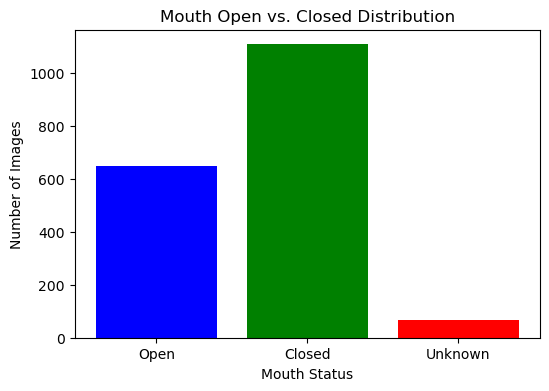

Total Images Processed: 1821
Mouth Open: 649
Mouth Closed: 1106
Unknown: 66


In [56]:
import cv2
import dlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# Load Dlib's pre-trained face detector and facial landmarks predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("./shape_predictor_68_face_landmarks.dat")

# Store results
mouth_status = {"Open": 0, "Closed": 0, "Unknown": 0}

# Define mouth landmark indices (upper and lower lip points)
UPPER_LIP_TOP = 62  # Upper lip midpoint
LOWER_LIP_BOTTOM = 66  # Lower lip midpoint

# Analyze images
for img_path in tqdm(image_paths):
    try:
        # Read image
        img = cv2.imread(img_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Detect faces
        faces = detector(gray)

        if len(faces) > 0:
            for face in faces:
                # Get facial landmarks
                landmarks = predictor(gray, face)

                # Extract lip positions
                upper_lip = landmarks.part(UPPER_LIP_TOP)
                lower_lip = landmarks.part(LOWER_LIP_BOTTOM)

                # Calculate vertical distance between lips
                lip_distance = abs(upper_lip.y - lower_lip.y)

                # Heuristic threshold: If lips are more than 5 pixels apart
                if lip_distance > 5:
                    mouth_status["Open"] += 1
                else:
                    mouth_status["Closed"] += 1
        else:
            mouth_status["Error"] += 1

    except Exception as e:
        print(f"Skipping {img_path} due to error: {e}")
        mouth_status["Unknown"] += 1

# Convert to DataFrame
df_mouth = pd.DataFrame(mouth_status.items(), columns=["Mouth Status", "Count"])

# Plot results
plt.figure(figsize=(6, 4))
plt.bar(df_mouth["Mouth Status"], df_mouth["Count"], color=["blue", "green", "red"])
plt.title("Mouth Open vs. Closed Distribution")
plt.xlabel("Mouth Status")
plt.ylabel("Number of Images")
plt.show()

# Print final stats
print("Total Images Processed:", sum(mouth_status.values()))
print("Mouth Open:", mouth_status["Open"])
print("Mouth Closed:", mouth_status["Closed"])
print("Unknown:", mouth_status["Unknown"])

I0000 00:00:1742931787.119124 17500469 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M1 Pro
W0000 00:00:1742931787.120557 18385637 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
  0%|          | 0/1800 [00:00<?, ?it/s]/var/folders/7w/rtrlnhcn37z0z3z15l7304dc0000gn/T/ipykernel_72528/2926509482.py:77: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 1 negative Z values that have been clipped to zero
  avg_rgb = lab2rgb(np.array(avg_lab).reshape(1, 1, 3))[0, 0] * 255
100%|██████████| 1800/1800 [00:08<00:00, 223.65it/s]


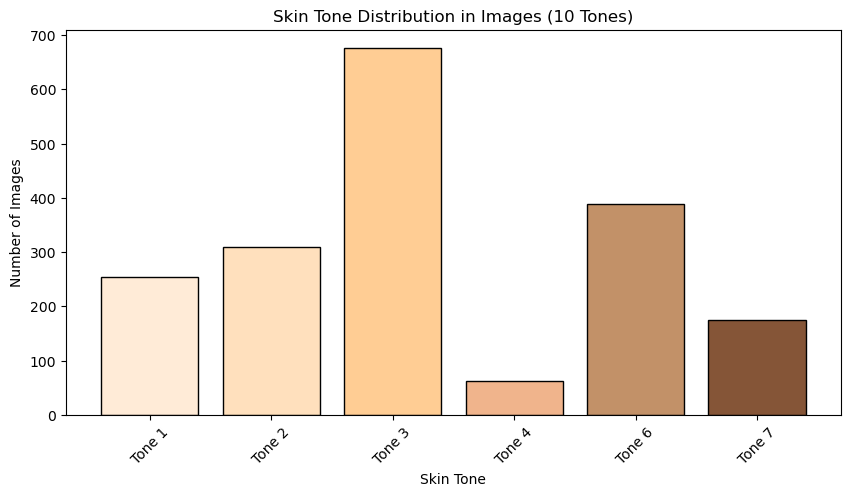

Total Images Processed: 1863

Skin Tone Distribution per Image:
 Tone 1    254
Tone 2    309
Tone 3    676
Tone 4     62
Tone 6    388
Tone 7    174
Name: count, dtype: int64


In [69]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import mediapipe as mp
from skimage.color import rgb2lab, lab2rgb

# Extended Fitzpatrick-like skin tones (from very pale to very dark)
skin_tone_palette = {
    "Tone 1": (255, 235, 215),  # Very Pale
    "Tone 2": (255, 224, 189),  # Fair
    "Tone 3": (255, 205, 148),  # Light
    "Tone 4": (240, 180, 140),  # Light-Medium
    "Tone 5": (214, 174, 136),  # Medium
    "Tone 6": (194, 145, 104),  # Olive
    "Tone 7": (133, 85, 55),    # Deep Brown
    "Tone 8": (105, 75, 50)     # Dark Brown
}

# Initialize Mediapipe face detector
mp_face_detection = mp.solutions.face_detection
face_detector = mp_face_detection.FaceDetection(min_detection_confidence=0.5)

# Function to classify skin tone based on closest match
def classify_skin_tone(rgb_color):
    """ Match RGB color to closest extended skin tone type """
    min_dist = float("inf")
    best_match = None

    for skin_tone, ref_rgb in skin_tone_palette.items():
        dist = np.linalg.norm(np.array(ref_rgb) - np.array(rgb_color))
        if dist < min_dist:
            min_dist = dist
            best_match = skin_tone

    return best_match

# Store results
image_skin_tones = []

for img_path in tqdm(image_paths):
    img = cv2.imread(img_path)
    if img is None:
        continue  # Skip invalid images

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = face_detector.process(img_rgb)
    
    skin_samples = []

    if results.detections:
        for detection in results.detections:
            bbox = detection.location_data.relative_bounding_box
            ih, iw, _ = img.shape
            x, y, w, h = (
                max(0, int(bbox.xmin * iw)),
                max(0, int(bbox.ymin * ih)),
                min(iw, int(bbox.width * iw)),
                min(ih, int(bbox.height * ih))
            )

            if x + w > iw or y + h > ih or w == 0 or h == 0:
                continue

            face_roi = img[y:y+h, x:x+w]

            if face_roi.size == 0:
                continue

            face_lab = cv2.cvtColor(face_roi, cv2.COLOR_BGR2LAB)
            skin_pixels = face_lab[h//4: 3*h//4, w//4: 3*w//4].reshape(-1, 3)

            if len(skin_pixels) > 0:
                avg_lab = np.mean(skin_pixels, axis=0)
                avg_rgb = lab2rgb(np.array(avg_lab).reshape(1, 1, 3))[0, 0] * 255
                avg_rgb = tuple(avg_rgb.astype(int))

                # Get matched skin tone
                skin_tone = classify_skin_tone(avg_rgb)
                image_skin_tones.append(skin_tone)

# Count occurrences and sort from lightest to darkest
tone_counts = pd.Series(image_skin_tones).value_counts()
ordered_tones = sorted(tone_counts.index, key=lambda t: list(skin_tone_palette.keys()).index(t))
tone_counts = tone_counts[ordered_tones]

# Plot skin tone distribution per image
plt.figure(figsize=(10, 5))
bars = plt.bar(tone_counts.index, tone_counts.values, color=[np.array(skin_tone_palette[t])/255 for t in tone_counts.index], edgecolor="black")

# Assign colors to bars
plt.xticks(rotation=45)
plt.title("Skin Tone Distribution in Images (10 Tones)")
plt.xlabel("Skin Tone")
plt.ylabel("Number of Images")
plt.show()

# Print results
print(f"Total Images Processed: {len(image_skin_tones)}")
print("\nSkin Tone Distribution per Image:\n", tone_counts)


Image Classification Statistics:
Suspected as Edited: 88
Original Images: 1712


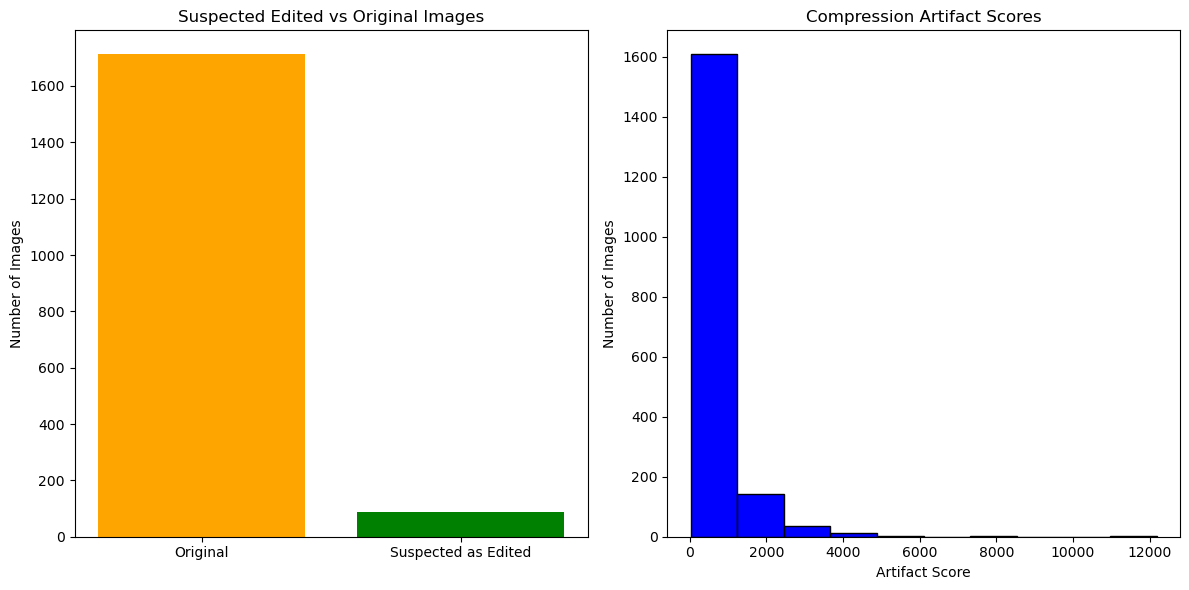

In [85]:
# Purpose: Identify images suspected as edited (filters / photoshop)
# Calculated Parmaters:
# * Compression Artifacts: We use the Laplacian operator to detect image sharpness.
#   A lower variance typically indicates smoother or more compressed (and possibly edited) images.
# * Edge Density: We apply the Canny edge detector. Edited images tend to have fewer sharp edges due to smoothing filters,
#   so we track edge density (higher is better for original images).
# Threshold Values:
# * artifact_threshold = 100: If the artifact score is below 100, the image is likely edited.
# * edge_threshold = 0.05: If the edge density is below 0.05, the image is likely edited.

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

# Function to detect compression artifacts (blockiness)
def check_compression_artifacts(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Apply Laplacian operator to detect edges
    laplacian = cv2.Laplacian(gray, cv2.CV_64F)
    var_laplacian = laplacian.var()  # Variance of Laplacian
    
    # Lower variance implies smoother, likely edited image
    return var_laplacian

# Function to detect noise patterns and compression artifacts
def detect_image_quality(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect edges using Canny edge detector
    edges = cv2.Canny(gray, 100, 200)
    edge_density = np.sum(edges) / (edges.shape[0] * edges.shape[1])

    # High edge density = sharpness, which suggests an original image
    return edge_density

# Function to classify image as 'edited' or 'original' based on thresholds
def classify_image(artifact_score, edge_score, artifact_threshold=100, edge_threshold=0.05):
    if artifact_score < artifact_threshold or edge_score < edge_threshold:
        return "Suspected as Edited"
    else:
        return "Original"

# Loop over dataset and analyze images
artifact_scores = []
edge_scores = []
image_classes = []

for image_path in image_paths:
    artifact_score = check_compression_artifacts(image_path)
    edge_score = detect_image_quality(image_path)
    
    # Classify image based on thresholds
    image_class = classify_image(artifact_score, edge_score)
    
    artifact_scores.append(artifact_score)
    edge_scores.append(edge_score)
    image_classes.append(image_class)

# Convert results to DataFrame
df = pd.DataFrame({
    "Image": image_paths, 
    "Artifact_Score": artifact_scores, 
    "Edge_Score": edge_scores,
    "Class": image_classes
})

# Show statistics: how many edited vs. original images
class_counts = df["Class"].value_counts()

# Print the statistics
print("Image Classification Statistics:")
print(f"Suspected as Edited: {class_counts.get('Suspected as Edited', 0)}")
print(f"Original Images: {class_counts.get('Original', 0)}")

# Plotting the results
plt.figure(figsize=(12, 6))

# Bar chart for classification statistics
plt.subplot(1, 2, 1)
plt.bar(class_counts.index, class_counts.values, color=['orange', 'green'])
plt.title('Suspected Edited vs Original Images')
plt.ylabel('Number of Images')

# Artifact Score
plt.subplot(1, 2, 2)
plt.hist(artifact_scores, bins=10, color='blue', edgecolor='black')
plt.title('Compression Artifact Scores')
plt.xlabel('Artifact Score')
plt.ylabel('Number of Images')

plt.tight_layout()
plt.show()


I0000 00:00:1742933226.452356 17500469 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M1 Pro
W0000 00:00:1742933226.455978 18397505 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1742933226.461325 18397505 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1742933226.463534 18397505 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.


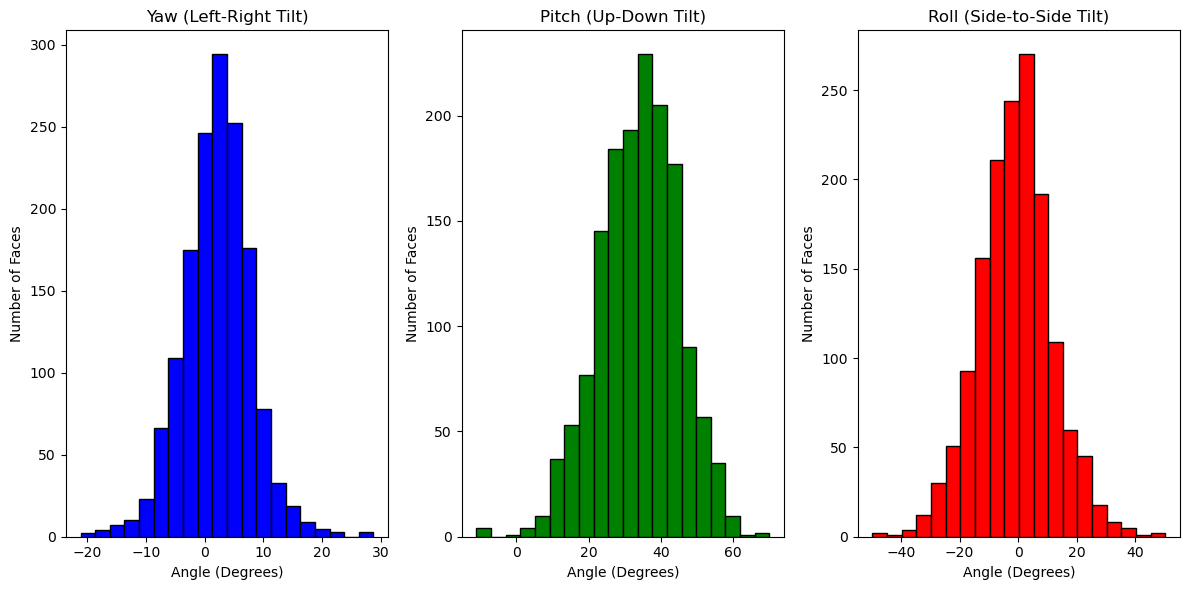

Avg Yaw: 2.18 degrees
Avg Pitch: 33.88 degrees
Avg Roll: -0.90 degrees


In [86]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R

# Initialize MediaPipe Face Mesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(min_detection_confidence=0.5)

# Function to detect the angle of the face using facial landmarks
def calculate_face_angle(image_path):
    # Load the image
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Process the image with MediaPipe FaceMesh
    results = face_mesh.process(img_rgb)

    if results.multi_face_landmarks:
        for face_landmarks in results.multi_face_landmarks:
            # Get the 3D landmarks
            nose = np.array([face_landmarks.landmark[1].x, face_landmarks.landmark[1].y, face_landmarks.landmark[1].z])
            left_eye = np.array([face_landmarks.landmark[33].x, face_landmarks.landmark[33].y, face_landmarks.landmark[33].z])
            right_eye = np.array([face_landmarks.landmark[133].x, face_landmarks.landmark[133].y, face_landmarks.landmark[133].z])
            chin = np.array([face_landmarks.landmark[152].x, face_landmarks.landmark[152].y, face_landmarks.landmark[152].z])

            # Calculate vectors
            eye_vector = right_eye - left_eye
            nose_chin_vector = chin - nose

            # Normalize the vectors
            eye_vector = eye_vector / np.linalg.norm(eye_vector)
            nose_chin_vector = nose_chin_vector / np.linalg.norm(nose_chin_vector)

            # Calculate the rotation using dot product
            yaw = np.arctan2(eye_vector[1], eye_vector[0]) * 180 / np.pi  # Yaw (left-right tilt)
            pitch = np.arctan2(nose_chin_vector[2], nose_chin_vector[1]) * 180 / np.pi  # Pitch (up-down tilt)
            roll = np.arctan2(nose_chin_vector[0], nose_chin_vector[1]) * 180 / np.pi  # Roll (side-to-side tilt)

            return yaw, pitch, roll

    return None, None, None  # No face detected

# Process all images in the dataset and calculate the angles
yaw_angles = []
pitch_angles = []
roll_angles = []

for image_path in image_paths:
    yaw, pitch, roll = calculate_face_angle(image_path)
    if yaw is not None:
        yaw_angles.append(yaw)
        pitch_angles.append(pitch)
        roll_angles.append(roll)

# Plotting the results
plt.figure(figsize=(12, 6))

# Bar chart for yaw (left-right tilt)
plt.subplot(1, 3, 1)
plt.hist(yaw_angles, bins=20, color='blue', edgecolor='black')
plt.title('Yaw (Left-Right Tilt)')
plt.xlabel('Angle (Degrees)')
plt.ylabel('Number of Faces')

# Bar chart for pitch (up-down tilt)
plt.subplot(1, 3, 2)
plt.hist(pitch_angles, bins=20, color='green', edgecolor='black')
plt.title('Pitch (Up-Down Tilt)')
plt.xlabel('Angle (Degrees)')
plt.ylabel('Number of Faces')

# Bar chart for roll (side-to-side tilt)
plt.subplot(1, 3, 3)
plt.hist(roll_angles, bins=20, color='red', edgecolor='black')
plt.title('Roll (Side-to-Side Tilt)')
plt.xlabel('Angle (Degrees)')
plt.ylabel('Number of Faces')

plt.tight_layout()
plt.show()

# Output some basic statistics
print(f"Avg Yaw: {np.mean(yaw_angles):.2f} degrees")
print(f"Avg Pitch: {np.mean(pitch_angles):.2f} degrees")
print(f"Avg Roll: {np.mean(roll_angles):.2f} degrees")
